# Índice de Diversidad de Shannon 

En esta actividad trabajamos con un dataset de abundancias de mosquitos Aedes spp. recolectados en Isla del Carmen (Campeche, México). El objetivo es explorar la abundancia de especies y calcular métricas de diversidad ecológica, en particular el índice de Shannon, así como riqueza de especies, abundancia total y equidad de Pielou.

Los pasos que seguí fueron:

1. Importar los datos desde un archivo `.csv`.
2. Explorar la abundancia de mosquitos con estadísticos descriptivos y visualizaciones (boxplots y violín por temporada).
3. Implementar una función en Python para calcular el índice de Shannon y métricas relacionadas.
4. Visualizar los resultados en un gráfico de barras comparando las estaciones del año.


count    864.000000
mean      23.151620
std       63.217306
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max      467.000000
Name: count, dtype: float64
        count       mean         std  min  25%  50%  75%    max
season                                                         
dry     108.0  38.546296  101.815518  0.0  0.0  0.0  0.0  467.0
norte   540.0  20.975926   56.485319  0.0  0.0  0.0  2.0  335.0
rainy   216.0  20.893519   52.417401  0.0  0.0  0.0  2.0  261.0


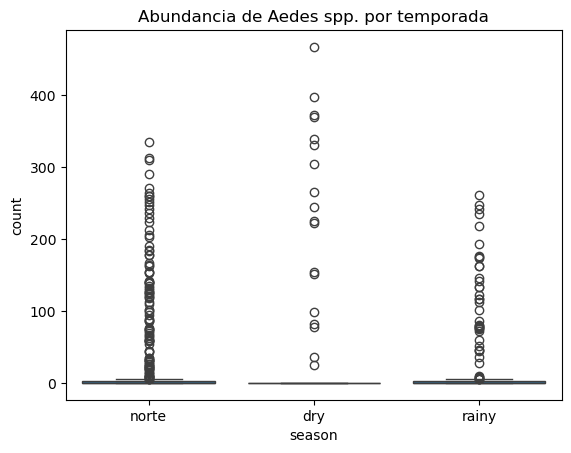

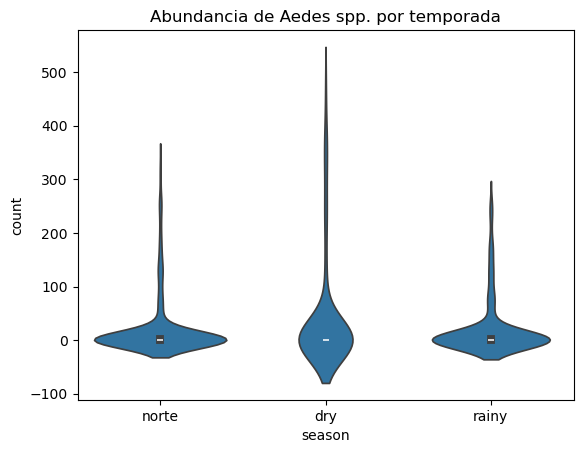

        Richness  Total abundance   Shannon  Evenness
season                                               
dry          6.0           4163.0  2.708420  0.937049
norte        6.0          11327.0  4.416283  0.810173
rainy        6.0           4513.0  3.579542  0.791621


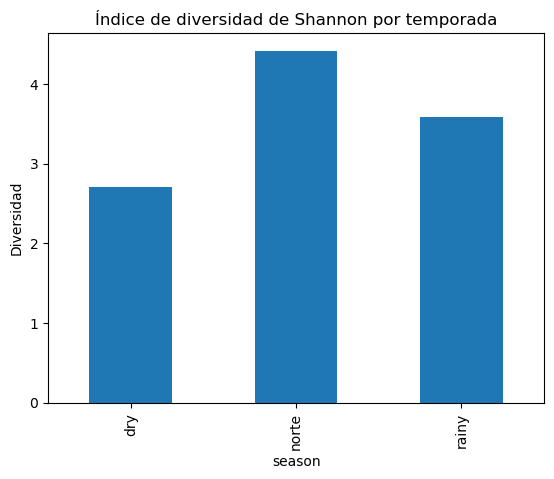

In [1]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy

# Función para importar CSV
def import_csv(file):
    return pd.read_csv(file)

# Cargar datos
path = "../data/aedes.csv"
aedes_df = import_csv(path)

# Estadísticos descriptivos de abundancia
print(aedes_df["count"].describe())

# Estadísticos descriptivos agrupados por temporada
print(aedes_df.groupby("season")["count"].describe())

# Boxplot de abundancia por temporada
sns.boxplot(x="season", y="count", data=aedes_df)
plt.title("Abundancia de Aedes spp. por temporada")
plt.show()

# Violin plot de abundancia por temporada
sns.violinplot(x="season", y="count", data=aedes_df)
plt.title("Abundancia de Aedes spp. por temporada")
plt.show()

# Función para calcular Shannon, riqueza, abundancia y equidad
def detailed_shannon(group):
    total = group["count"].sum()
    props = group["count"] / total
    props = props[props > 0]  # evitar problemas con ceros
    shannon = -sum(props * np.log(props))

    return pd.Series({
        "Richness": group["species"].nunique(),
        "Total abundance": total,
        "Shannon": shannon,
        "Evenness": shannon / np.log(len(props)) if len(props) > 0 else 0
    })

# Aplicar la función por temporada
results = (
    aedes_df.drop(columns="season")
    .groupby(aedes_df["season"], group_keys=False)
    .apply(detailed_shannon)
)

print(results)

# Gráfico de Shannon por temporada
results.reset_index().plot.bar(x="season", y="Shannon", legend=False)
plt.title("Índice de diversidad de Shannon por temporada")
plt.ylabel("Diversidad")
plt.show()


### Conclusión

Al calcular los índices de diversidad de Shannon por temporada, observé que todas las estaciones presentan la misma riqueza de especies (6), lo que indica que no cambia el número de especies registradas. Sin embargo, sí hay diferencias importantes en la abundancia total y en cómo se distribuyen los individuos. Durante la temporada norte se registró la mayor abundancia (11,327 individuos) y también el valor de Shannon más alto (4.42), lo que refleja una comunidad más diversa en términos de abundancia relativa. En contraste, la temporada seca tuvo menor abundancia total (4,163) y el Shannon más bajo (2.71), aunque presentó la mayor equitatividad (0.94), es decir, las especies estuvieron representadas de manera más balanceada. La temporada lluviosa se ubicó en un punto intermedio (Shannon = 3.58; abundancia = 4,513; equitatividad = 0.79).

En resumen, aunque las tres temporadas tienen el mismo número de especies, los cambios en abundancia y equitatividad muestran cómo varía la estructura de la comunidad de mosquitos a lo largo del año.
